# LightGBM Model

In [12]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('../data/processed/features_dataset_v2.csv', parse_dates=['date'])
df = df.sort_values('date').reset_index(drop=True)

In [13]:
df['benzina_next'] = df['benzina'].shift(-1)
df['gasolio_next'] = df['gasolio'].shift(-1)

df = df.dropna().reset_index(drop=True)

In [14]:
feature_cols = [
    c for c in df.columns 
    if c not in ['date','benzina','gasolio','benzina_next','gasolio_next']
]

X = df[feature_cols]
y_b = df['benzina_next']
y_g = df['gasolio_next']

In [15]:
test_size = 52

X_train = X[:-test_size]
X_test  = X[-test_size:]

y_train_b = y_b[:-test_size]
y_test_b  = y_b[-test_size:]

y_train_g = y_g[:-test_size]
y_test_g  = y_g[-test_size:]

lgb_params = {
    'n_estimators': 1500,
    'learning_rate': 0.02,
    'num_leaves': 31,
    'max_depth': -1,
    'min_child_samples': 30,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'reg_alpha': 0.1,
    'reg_lambda': 0.2,
    'random_state': 42
}

lgb_b = LGBMRegressor(**lgb_params)
lgb_g = LGBMRegressor(**lgb_params)


Train LightGBM for Benzina

In [16]:
lgb_b.fit(X_train, y_train_b)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9583
[LightGBM] [Info] Number of data points in the train set: 980, number of used features: 41
[LightGBM] [Info] Start training from score 1.547317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.02
,n_estimators,1500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,30


Gasolio

In [17]:
lgb_g.fit(X_train, y_train_g)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9583
[LightGBM] [Info] Number of data points in the train set: 980, number of used features: 41
[LightGBM] [Info] Start training from score 1.439394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.02
,n_estimators,1500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,30


In [18]:
def eval(model, X, y):
    pred = model.predict(X)
    mae  = mean_absolute_error(y, pred)
    rmse = np.sqrt(mean_squared_error(y, pred))
    return mae, rmse

print("LightGBM Benzina:", eval(lgb_b, X_test, y_test_b))
print("LightGBM Gasolio:", eval(lgb_g, X_test, y_test_g))


LightGBM Benzina: (0.00851495287813687, np.float64(0.010419410110567014))
LightGBM Gasolio: (0.011559570410840249, np.float64(0.0158918793212821))


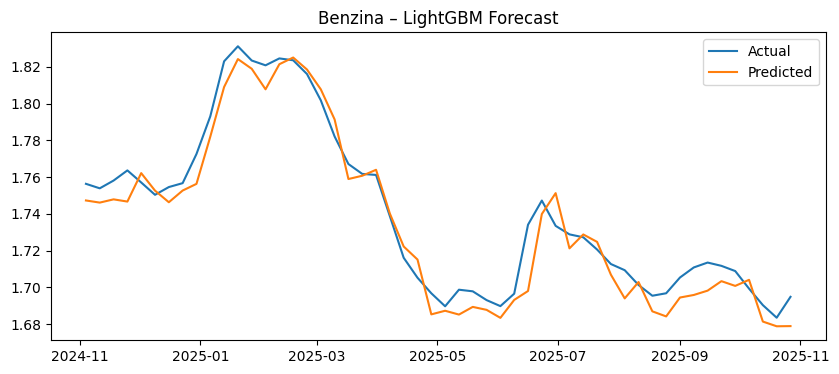

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df['date'].iloc[-52:], y_test_b, label='Actual')
plt.plot(df['date'].iloc[-52:], lgb_b.predict(X_test), label='Predicted')
plt.title('Benzina – LightGBM Forecast')
plt.legend()
plt.show()
